In [1]:
import pandas as pd
import matplotlib.pyplot  as plt


In [3]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

In [4]:
# Drop the 'City' column
data = data.drop(columns=['City'])

# Group by 'Country' and calculate the mean for all numeric columns
country_aggregated = data.groupby('Country').mean().reset_index()

# Round all numeric columns to 0 decimal places
country_aggregated = country_aggregated.round(0)

# Display the result
country_aggregated.head()


,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
0,AF,6.0,24.0,0.0,71.0,1.0,220.0,0.0,18.0
1,AO,7.0,9.0,1.0,26.0,0.0,333.0,0.0,8.0
2,AR,3.0,4.0,8.0,35.0,3.0,418.0,1.0,14.0
3,AU,3.0,8.0,2.0,45.0,1.0,252.0,0.0,7.0
4,BD,20.0,22.0,4.0,28.0,0.0,487.0,2.0,16.0


In [17]:
df_ranked = country_aggregated.sort_values(by='MortalityRate_per_100k', ascending=False)
df_ranked

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
84,UA,3.0,3.0,2.0,36.0,1.0,225.0,0.0,46.0
29,GE,0.0,1.0,1.0,89.0,0.0,217.0,0.0,44.0
48,LV,0.0,1.0,1.0,56.0,0.0,227.0,0.0,37.0
70,RO,12.0,13.0,6.0,39.0,1.0,250.0,1.0,36.0
16,CN,36.0,76.0,11.0,44.0,12.0,415.0,8.0,27.0
...,...,...,...,...,...,...,...,...,...
94,ZM,2.0,2.0,0.0,29.0,0.0,322.0,1.0,6.0
83,TZ,4.0,8.0,0.0,28.0,0.0,245.0,1.0,5.0
56,MV,1.0,2.0,0.0,43.0,0.0,231.0,0.0,5.0
57,MW,5.0,6.0,0.0,56.0,0.0,367.0,1.0,5.0


In [6]:
x_axis = df_ranked['Country']
y_axis = df_ranked['MortalityRate_per_100k']

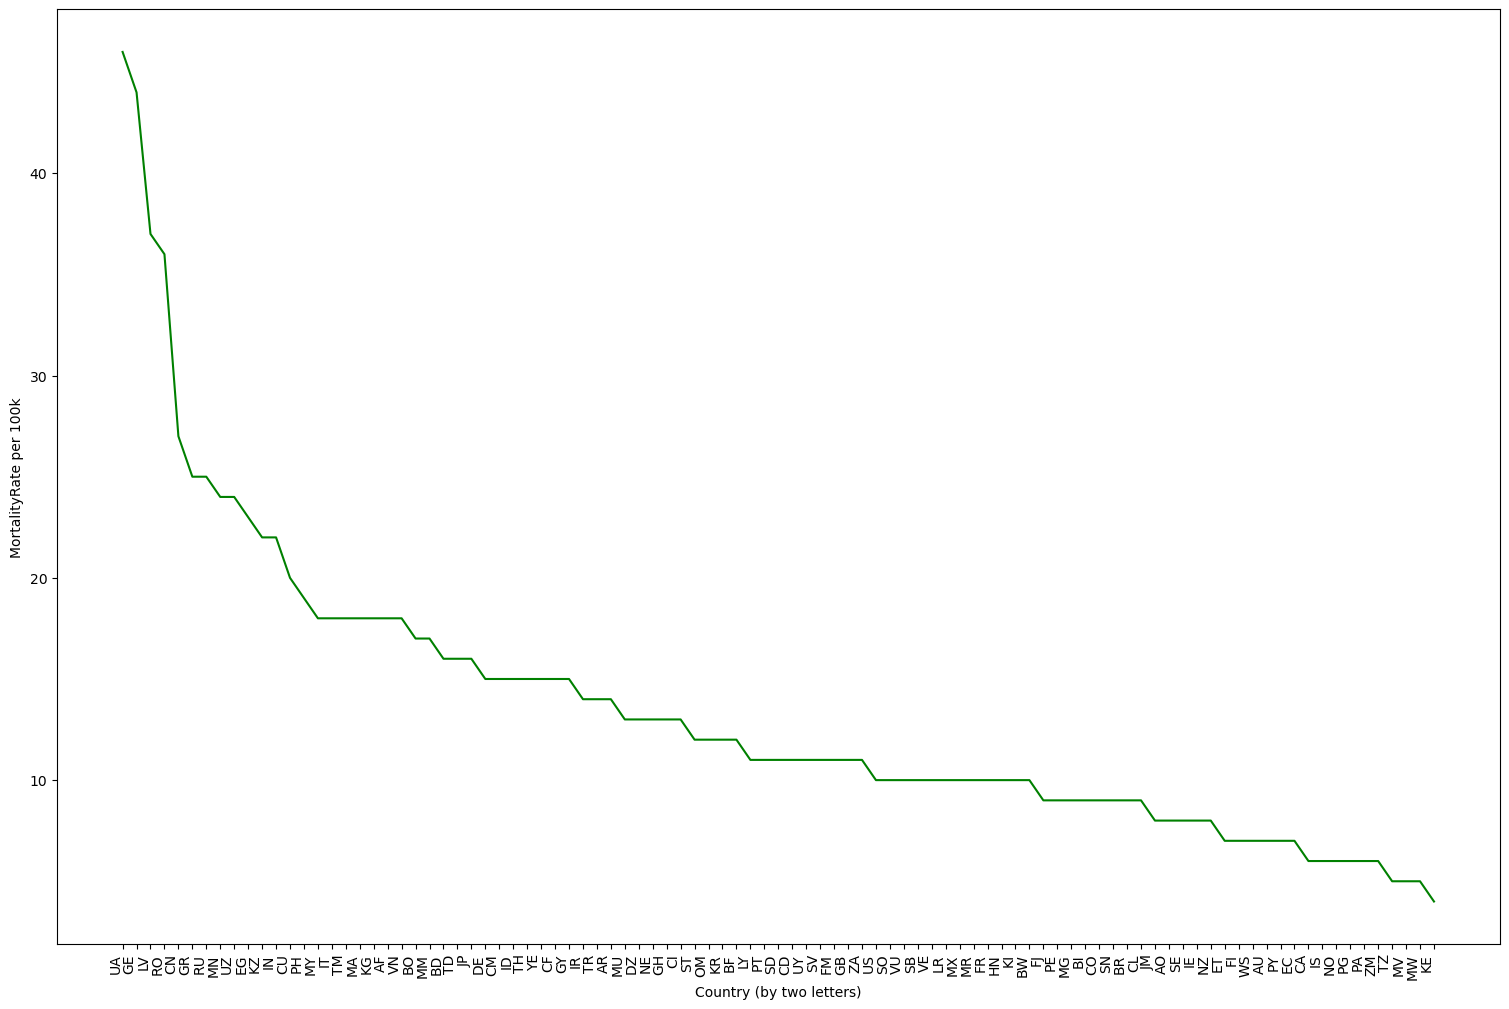

In [7]:
plt.figure(figsize=(15, 10)) 
plt.plot(x_axis,y_axis, color='green')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.xlabel("Country (by two letters)")
plt.ylabel("MortalityRate per 100k")
plt.show() 


In [18]:
country_x_aixs = df_ranked['Country']
PM10_y_axis = df_ranked['PM10']

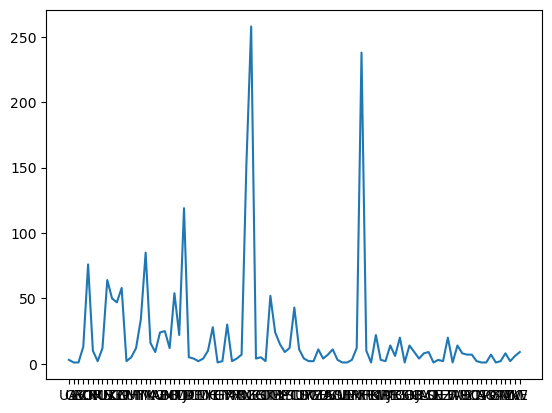

In [20]:
plt.plot(country_x_aixs, PM10_y_axis)
plt.show()


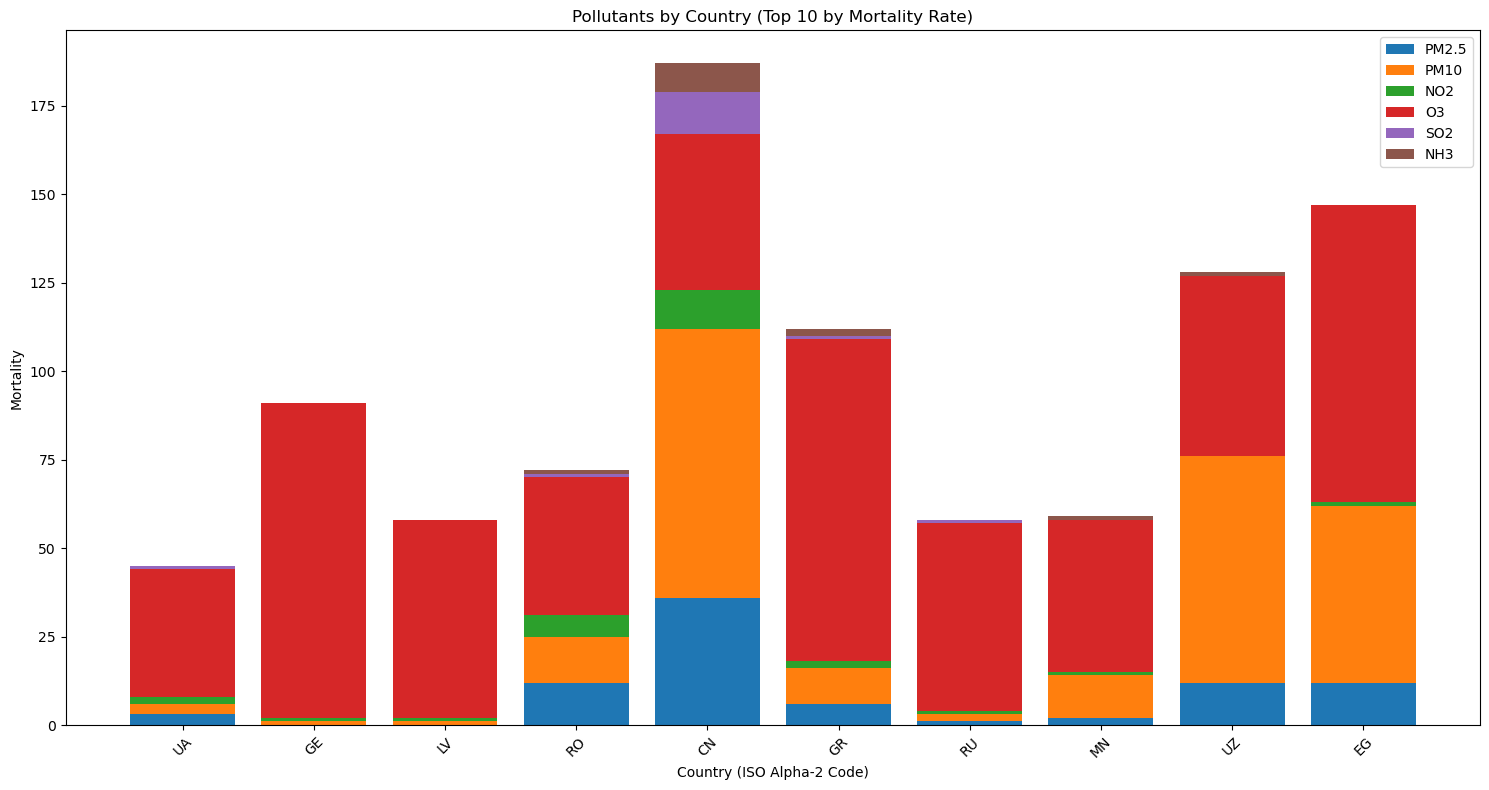

In [10]:
top_10 = df_ranked.head(10)
plt.figure(figsize=(15, 8))
plt.bar(top_10['Country'], top_10['PM2.5'], label='PM2.5')
plt.bar(top_10['Country'], top_10['PM10'], bottom=top_10['PM2.5'], label='PM10')
plt.bar(top_10['Country'], top_10['NO2'], bottom=top_10['PM2.5'] + top_10['PM10'], label='NO2')
plt.bar(top_10['Country'], top_10['O3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'], label='O3')
plt.bar(top_10['Country'], top_10['SO2'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'], label='SO2')
plt.bar(top_10['Country'], top_10['NH3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'] + top_10['SO2'], label='NH3')

plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Mortality')
plt.title('Pollutants by Country (Top 10 by Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
bot_10 = df_ranked.sort_values(by='MortalityRate_per_100k', ascending=True).head(10)
bot_10

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
42,KE,4.0,9.0,1.0,25.0,0.0,225.0,1.0,4.0
83,TZ,4.0,8.0,0.0,28.0,0.0,245.0,1.0,5.0
57,MW,5.0,6.0,0.0,56.0,0.0,367.0,1.0,5.0
56,MV,1.0,2.0,0.0,43.0,0.0,231.0,0.0,5.0
10,CA,1.0,2.0,1.0,61.0,0.0,209.0,1.0,6.0
38,IS,1.0,1.0,1.0,47.0,0.0,221.0,0.0,6.0
94,ZM,2.0,2.0,0.0,29.0,0.0,322.0,1.0,6.0
66,PG,7.0,7.0,0.0,16.0,15.0,168.0,0.0,6.0
64,PA,1.0,1.0,2.0,14.0,0.0,264.0,3.0,6.0
61,NO,0.0,1.0,1.0,60.0,0.0,218.0,0.0,6.0


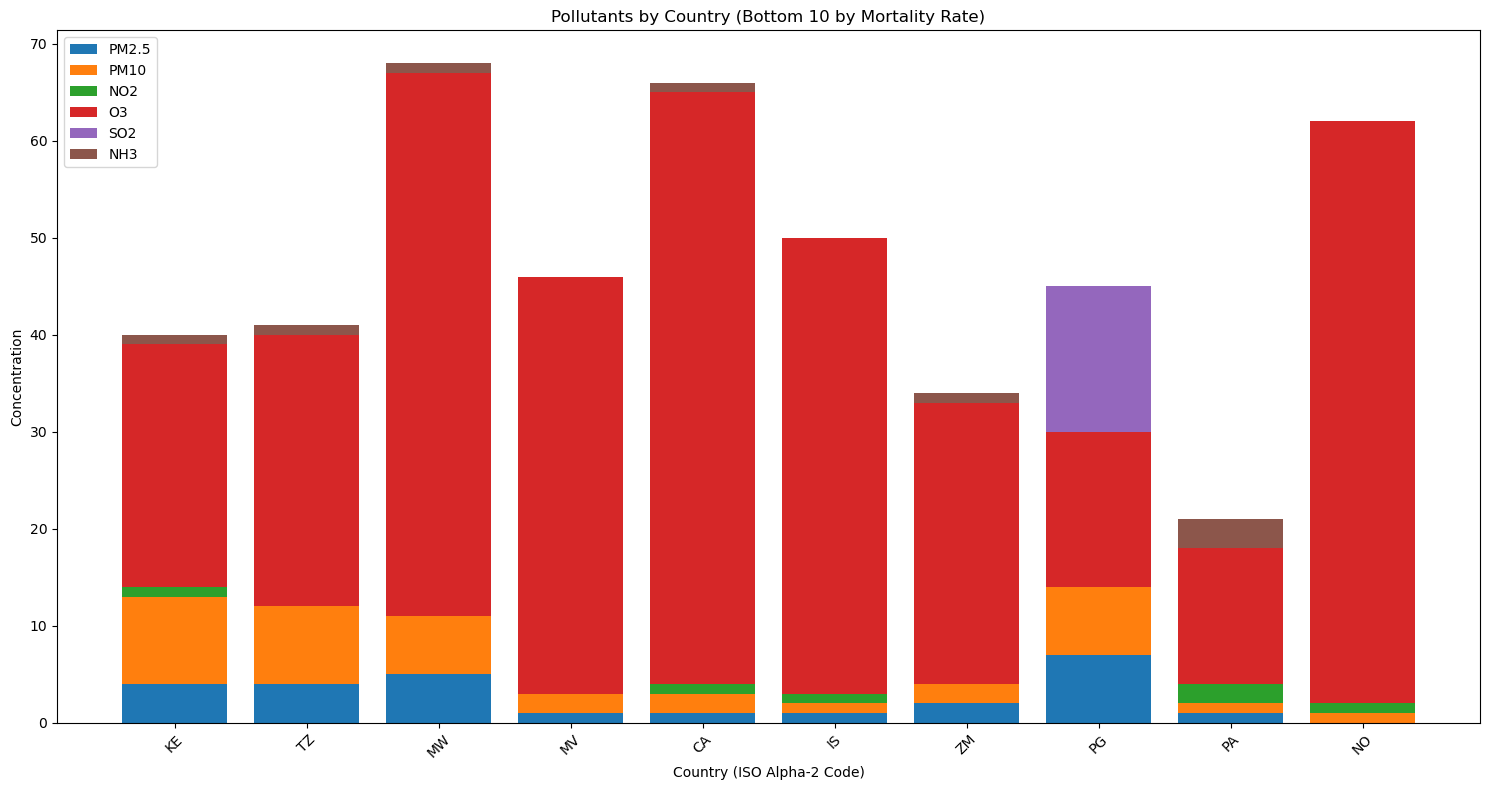

In [74]:
plt.figure(figsize=(15, 8))
plt.bar(bot_10['Country'], bot_10['PM2.5'], label='PM2.5')
plt.bar(bot_10['Country'], bot_10['PM10'], bottom=bot_10['PM2.5'], label='PM10')
plt.bar(bot_10['Country'], bot_10['NO2'], bottom=bot_10['PM2.5'] + bot_10['PM10'], label='NO2')
plt.bar(bot_10['Country'], bot_10['O3'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'], label='O3')
plt.bar(bot_10['Country'], bot_10['SO2'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'] + bot_10['O3'], label='SO2')
plt.bar(bot_10['Country'], bot_10['NH3'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'] + bot_10['O3'] + bot_10['SO2'], label='NH3')

plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Concentration')
plt.title('Pollutants by Country (Bottom 10 by Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
combined_df = pd.concat([top_10, bot_10])


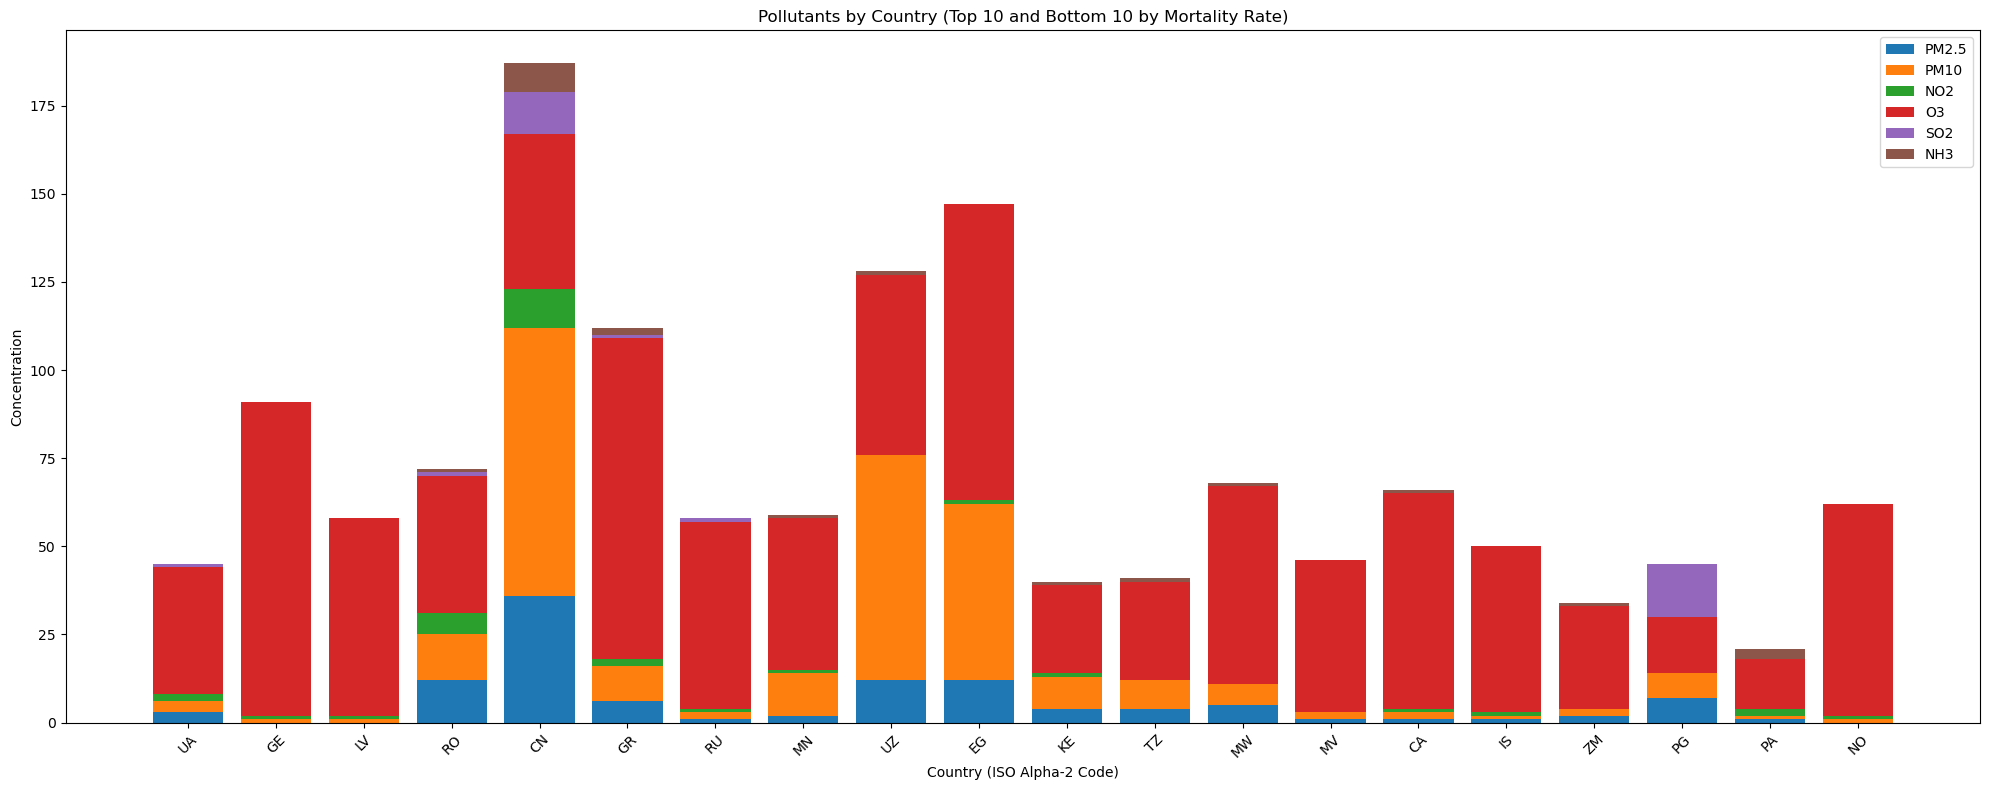

In [76]:
plt.figure(figsize=(20, 8))  # Increase the width for better readability

# Create a stacked bar chart excluding CO
plt.bar(combined_df['Country'], combined_df['PM2.5'], label='PM2.5')
plt.bar(combined_df['Country'], combined_df['PM10'], bottom=combined_df['PM2.5'], label='PM10')
plt.bar(combined_df['Country'], combined_df['NO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'], label='NO2')
plt.bar(combined_df['Country'], combined_df['O3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'], label='O3')
plt.bar(combined_df['Country'], combined_df['SO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'], label='SO2')
plt.bar(combined_df['Country'], combined_df['NH3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2'], label='NH3')

# Add labels and title
plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Concentration')
plt.title('Pollutants by Country (Top 10 and Bottom 10 by Mortality Rate)')
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [79]:
df_CO_ranked = country_aggregated.sort_values(by='CO', ascending=False)
df_CO_ranked

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
52,MM,47.0,54.0,18.0,12.0,3.0,1295.0,30.0,17.0
40,JM,6.0,8.0,12.0,35.0,6.0,694.0,3.0,8.0
36,IN,53.0,58.0,9.0,30.0,9.0,663.0,6.0,22.0
7,BO,11.0,12.0,2.0,55.0,0.0,607.0,1.0,17.0
59,MY,11.0,12.0,6.0,40.0,1.0,581.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...
82,TR,2.0,2.0,1.0,28.0,0.0,190.0,1.0,14.0
50,MA,4.0,16.0,4.0,43.0,4.0,189.0,0.0,18.0
60,NE,60.0,258.0,0.0,47.0,0.0,181.0,0.0,13.0
26,FM,0.0,2.0,0.0,24.0,0.0,169.0,0.0,11.0


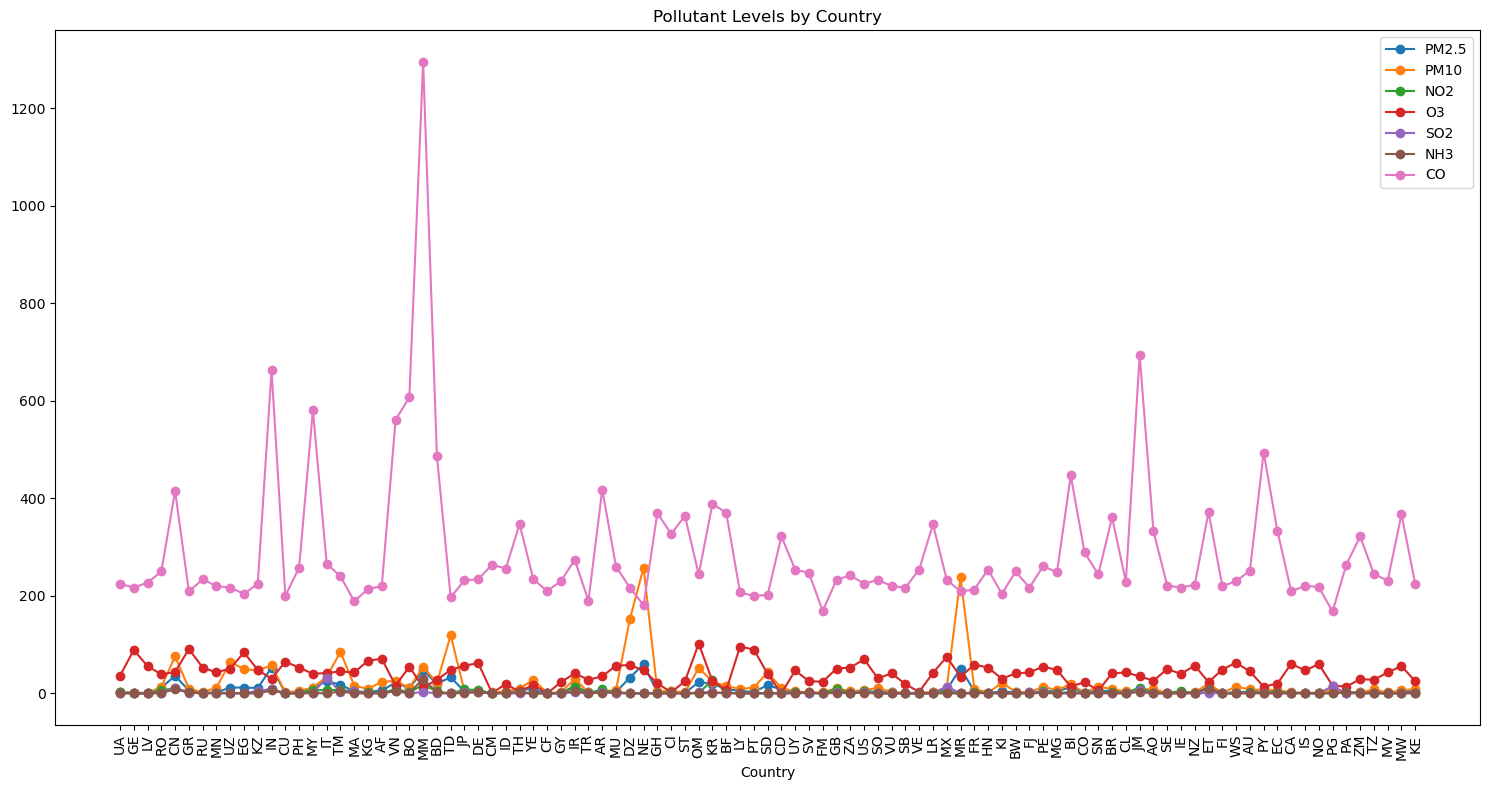

In [15]:
# Plot settings
plt.figure(figsize=(15, 8))  # Adjust figure size as needed

# Plot each pollutant as a line
plt.plot(df_ranked['Country'], df_ranked['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_ranked['Country'], df_ranked['PM10'], label='PM10', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NO2'], label='NO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['O3'], label='O3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['SO2'], label='SO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NH3'], label='NH3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['CO'], label='CO', marker='o')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('')
plt.title('Pollutant Levels by Country')
plt.xticks(rotation=90)

# Display the legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
